<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TRABALHANDO-COM-TABELAS-07/blob/main/Gustavo_Bezerra_Projeto_Aplicado_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Classificando as ocorrências policiais

Para este projeto exploraremos os dados **Call_Data_Small.csv** disponível no meu github.

Explicando o caso:

Para facilitar a administração da segurança pública, o Departamento de Polícia de Seattle dividiu a cidade em 5 partes, cada uma com uma delegacia. Cada delegacia foi subdividida em setores, e estes foram divididos em beats (hondas). A administração tem um dataset chamado Call_Data, para obter maiores informações acesse este [link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy).

O objetivo do nosso projeto é apoiar os policiais quanto as medidas prescritivas que eles devem tomar ao tentarem resolver uma chamada, ou seja, a depender da análise de cada caso, qual decisão tomar. Para isto eles têm disponível o histórico de tudo o que já foi resolvido em outras chamadas de emergência. Sua solução de Machine Learning deve ser capaz de classificar cada tipo de ocorrência de acordo com suas características. A variável alvo da nossa prova que será **Event Clearance Description**.

**PS.:**
* Quando houver necessidade de splitar os dados aplique a proporção 70 para treino e 30 para teste
* Quando houver necessidade de utilizar o random_state defina o valor 100

##Hands on!

* **1. Importe o data set *call_data_small.csv* e considere a variável alvo 'Event Clearance Description'(1,0 pontos)**
   * PS.: Lembre-se de importar as bibliotecas necessárias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

link: https://raw.githubusercontent.com/amandaacacio/DatasetsML/main/Call_Data_Small.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amandaacacio/DatasetsML/main/Call_Data_Small.csv')

**2. Realize o EDA que você julgar necessário (análise exploratória dos dados), o objetivo do EDA é mostrar alguns insights sobre os dados (2,0 pontos)**
   * PS.: Utilize recursos visuais, por exemplo gráficos
       * **Como está o balanceamento das classes?**

In [3]:
# Analisando a Tabela e os Tipos de Dados
df.head()

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3
3,6,2009000189345,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1
4,8,2009000189348,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93902 entries, 0 to 93901
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   93902 non-null  int64 
 1   CAD Event Number             93902 non-null  int64 
 2   Event Clearance Description  93902 non-null  object
 3   Call Type                    93902 non-null  object
 4   Priority                     93902 non-null  int64 
 5   Initial Call Type            93902 non-null  object
 6   Final Call Type              93902 non-null  object
 7   Original Time Queued         93902 non-null  object
 8   Arrived Time                 93902 non-null  object
 9   Precinct                     93902 non-null  object
 10  Sector                       93305 non-null  object
 11  Beat                         93902 non-null  object
dtypes: int64(3), object(9)
memory usage: 8.6+ MB


In [5]:
df.describe()

,Unnamed: 0,CAD Event Number,Priority
count,93902.000000,9.390200e+04,93902.000000
mean,100829.351909,2.009001e+12,3.942483
std,57644.308684,2.260273e+07,2.097313
min,1.000000,2.009000e+12,1.000000
25%,51169.000000,2.009000e+12,2.000000
50%,101452.000000,2.009000e+12,3.000000
75%,150554.500000,2.009000e+12,7.000000
max,199998.000000,2.011000e+12,9.000000


In [6]:
df.describe(include='object')

,Event Clearance Description,Call Type,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
count,93902,93902,93902,93902,93902,93902,93902,93305,93902
unique,7,7,223,302,93650,87919,6,17,81
top,REPORT WRITTEN (NO ARREST),ONVIEW,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,08/10/2009 03:36:10 AM,Jan 1 1900 12:00:00:000AM,WEST,KING,K3
freq,38008,35051,10430,9547,2,5716,27959,8304,3265


<Axes: xlabel='count', ylabel='Sector'>

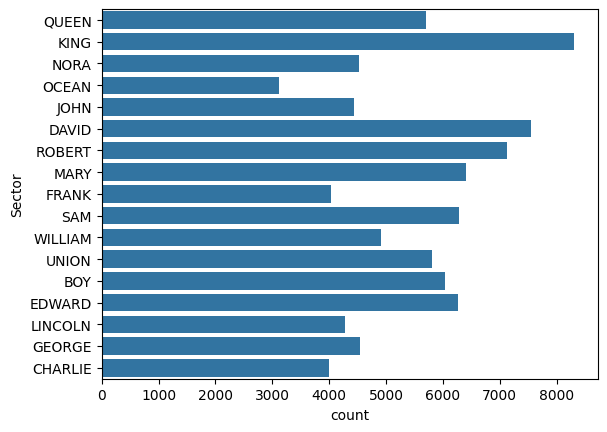

In [10]:
# A distribuição das ocorrências/ligações por setores apontam a maior parte para:
# KING, DAVID E ROBERT
sns.countplot(y="Sector", data=df)

<Axes: xlabel='count', ylabel='Event Clearance Description'>

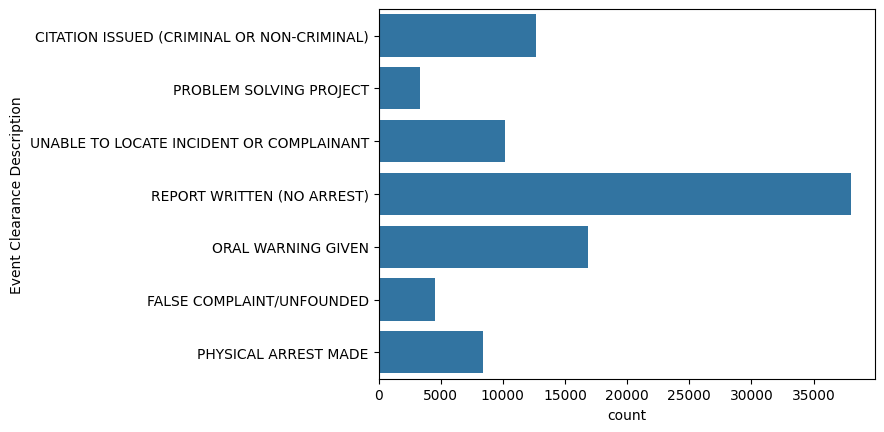

In [9]:
# A distribuição das ocorrências/ligações por evento apontam a maior parte para: NO ARREST
sns.countplot(y="Event Clearance Description", data=df)

,Unnamed: 0,CAD Event Number,Priority
Unnamed: 0,1.000000,0.018165,0.009683
CAD Event Number,0.018165,1.000000,0.001816
Priority,0.009683,0.001816,1.000000


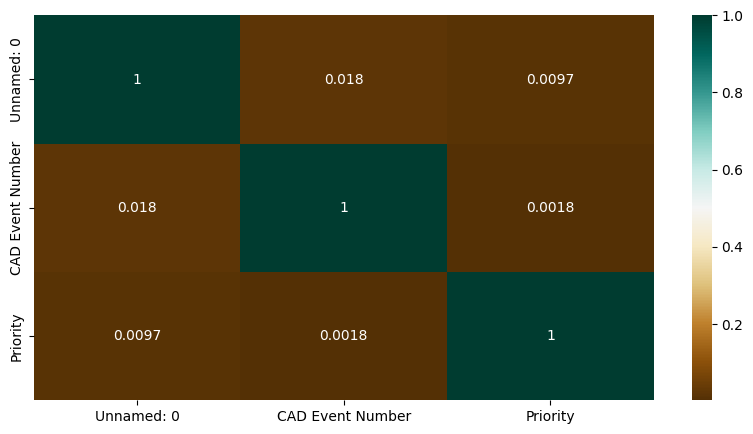

In [ ]:
#Selecionando apenas dados numéricos e montando matriz de correlação:
numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,5))
c= numeric.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

**3. Realize o tratamento que você julgar mais adequado aos dados. (2,0 pontos)**
  * P.S.: Explique, com suas palavras, porque o processo de feature engineering é necessário


# Valores Ausentes

In [38]:
# Existencia de valores duplicados (Não existe)
duplicate_rows_df = df[df.duplicated()]
print("linhas duplicadas: ", duplicate_rows_df.shape)

linhas duplicadas:  (0, 11)


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
CAD Event Number,0
Event Clearance Description,0
Call Type,0
Priority,0
Initial Call Type,0
Final Call Type,0
Original Time Queued,0
Arrived Time,0
Precinct,0


In [ ]:
## Esta forma de substituição não seria uma ótima saida a se tomar,
## por esse motivo vamos realizar a limpeza de dados usando VALORES NULOS para os 0.

# Substituindo valores ausentes em colunas categóricas com a moda

categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_features:
   df[col] = df[col].fillna(df[col].mode()[0])


In [23]:
# Temos 597 valores zerados na coluna SECTOR, iremos substitui-los por NaN

df[['Sector']] = df[['Sector']].replace(0,np.NaN)

In [24]:
df['Sector'].fillna("n/a", inplace = True)

In [25]:
df = df.drop_duplicates()

In [26]:
df.isnull().sum()

,0
Unnamed: 0,0
CAD Event Number,0
Event Clearance Description,0
Call Type,0
Priority,0
Initial Call Type,0
Final Call Type,0
Original Time Queued,0
Arrived Time,0
Precinct,0


In [27]:
## Agora iremos juntar duas colunas para diminuir a memoria de trabalho,
## vacilitar o processamento no Software e nosso trabalho.

# Transformando as colunas no mesmo padrão do datetime (dia/mes/ano  horas/minutos/segundos turno)
df['Original Time Queued'] = pd.to_datetime(df['Original Time Queued'])
df['Arrived Time'] = pd.to_datetime(df['Arrived Time'], format='%b  %d %Y %I:%M:%S:%f%p')

In [30]:
# Relacionando as colunas 'Original Time Queued' e 'Arrived Time', e criando uma nova coluna

# Criando a feature "tempo diff - Para medir o tempo de chegada da policia em cada ocorrencia"

def calcular_diferenca(row):
    return (row['Arrived Time'] - row['Original Time Queued']).total_seconds() / 60
df['Time diff'] = df.apply(calcular_diferenca, axis=1)

In [32]:
df.head(2)

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Time diff
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,2009-06-02 03:43:08,2009-06-02 05:47:21,WEST,QUEEN,Q1,124.216667
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",2009-06-02 03:47:24,2009-06-02 03:47:24,WEST,KING,K1,0.000000


In [33]:
#excluindo as datas originais
exc_columns = ['Arrived Time', 'Original Time Queued']
df = df.drop(columns= exc_columns, axis=1)

In [34]:
df.head(2)

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,Time diff
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,WEST,QUEEN,Q1,124.216667
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",WEST,KING,K1,0.000000


,Unnamed: 0,CAD Event Number,Event Clearance Description,Priority,Time diff
Unnamed: 0,1.000000,0.018165,0.006935,0.009683,-0.002060
CAD Event Number,0.018165,1.000000,-0.003429,0.001816,0.004071
Event Clearance Description,0.006935,-0.003429,1.000000,-0.401091,0.068017
Priority,0.009683,0.001816,-0.401091,1.000000,0.115003
Time diff,-0.002060,0.004071,0.068017,0.115003,1.000000


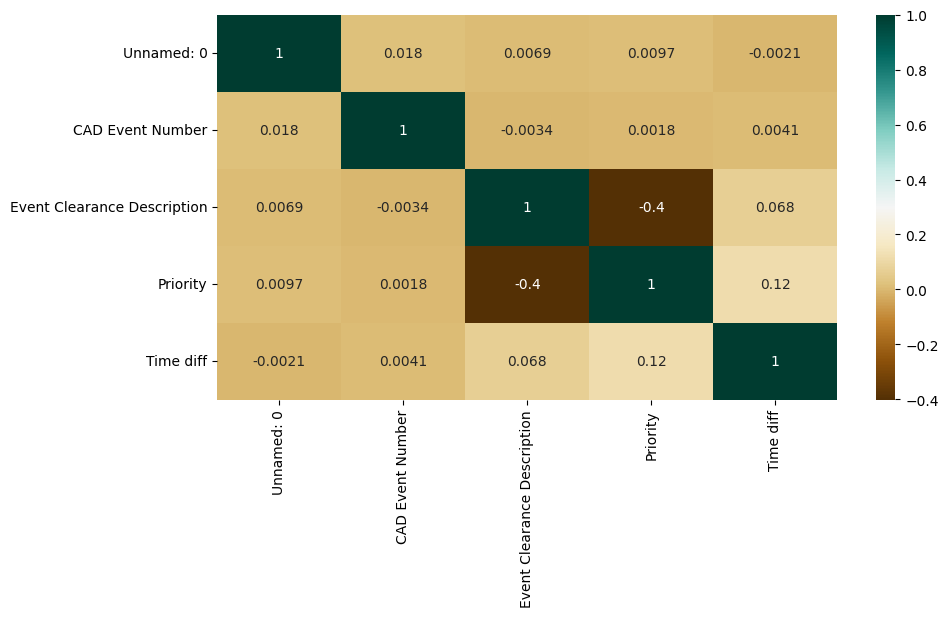

In [48]:
#Selecionando apenas dados numéricos e montando matriz de correlação:
numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,5))
c= numeric.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [35]:
#Definindos as variaveis alvo e preditoras e trabalhando as categoricas
df_final = df

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_final['Event Clearance Description']= label_encoder.fit_transform(df_final['Event Clearance Description'])

y = df_final['Event Clearance Description'].values
df_final = df_final.drop(columns='Event Clearance Description')
df_final = pd.get_dummies(df_final)
X = df_final.values

In [36]:
from sklearn.preprocessing import StandardScaler
#Normalizando os dados
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [37]:
#dividindo o dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

**4. Além da Regressão Logística, pesquise e selecione outra solução candidata e justifique sua escolha. Mostre os pontos negativos e positivos de cada modelo. (2 pontos)**

**5. Construa o modelo de aprendizagem de máquina (Preferencialmente utilize regressão logística, pois, foi o que aprendemos neste curso. Se preferir utilizar a solução pesquisada na questão anterior, fique à vontade e ganhe +1 ponto) (1,0 ponto a 2,0 pontos)**    

In [39]:
#Regressão Logistica Multiclasse
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')

#FIT do modelo
model_LR.fit(X_train, y_train)

#Fazendo previsões em cima dos dados de teste
y_pred = model_LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
score_LR = model_LR.score(X_test, y_test)
print('A acurácia do modelo Regressão Logística é:', score_LR)

A acurácia do modelo Regressão Logística é: 0.7873699904156757


In [42]:
#Metricas de classificação
from sklearn import metrics
LR_report = metrics.classification_report(y_test, y_pred)
print(LR_report)

              precision    recall  f1-score   support

           0       0.66      0.87      0.75      3811
           1       0.96      0.90      0.93      1344
           2       0.75      0.65      0.69      5038
           3       0.76      0.61      0.67      2477
           4       0.93      0.91      0.92      1014
           5       0.87      0.92      0.89     11384
           6       0.62      0.50      0.55      3103

    accuracy                           0.79     28171
   macro avg       0.79      0.76      0.77     28171
weighted avg       0.79      0.79      0.78     28171



In [43]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(random_state=100)

#Fit do modelo
model_RFC.fit(X_train, y_train)

#Fazendo previsões em cima dos dados de teste
y_pred_RFC = model_RFC.predict(X_test)

In [44]:
score_RFC = model_RFC.score(X_test, y_test)
print('A Acurácia do modelo Random Forest Classifier é:',score_RFC)

A Acurácia do modelo Random Forest Classifier é: 0.7586880124951191


In [45]:
#imprimir modelo de classificação
RFC_report = metrics.classification_report(y_test, y_pred_RFC)
print(RFC_report)

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      3811
           1       0.95      0.90      0.92      1344
           2       0.66      0.66      0.66      5038
           3       0.71      0.56      0.63      2477
           4       0.91      0.90      0.91      1014
           5       0.84      0.92      0.88     11384
           6       0.59      0.48      0.53      3103

    accuracy                           0.76     28171
   macro avg       0.76      0.73      0.74     28171
weighted avg       0.75      0.76      0.75     28171



**6. Defina uma métrica de avaliação e avalie as soluções candidatas. Justifique a escolha da sua métrica. (2,0 ponto)**

**7. Se seu modelo permitir analisar a importância das features, analise-o e tente justificar de forma subjetiva a importância das features. Por exemplo, a feature chamadas_a_noite possui um alto coeficiente, pois há uma tendência dos crimes acontecerem a noite, não tão simples assim :P. (1,0 ponto)**

In [ ]:
import itertools
import numpy as np

features = df_final.columns
df_import_features = dict(zip(features, model_LR.feature_importances_))
df_import_features = pd.DataFrame.from_dict(df_import_features, orient='index', columns = ['value'])
df_import_features = df_import_features.sort_values(['value'], ascending=False)
df_import_features.head()

In [46]:
import itertools
import numpy as np

features = df_final.columns
df_import_features = dict(zip(features, model_RFC.feature_importances_))
df_import_features = pd.DataFrame.from_dict(df_import_features, orient='index', columns = ['value'])
df_import_features = df_import_features.sort_values(['value'], ascending=False)
df_import_features.head()

,value
Unnamed: 0,0.099424
CAD Event Number,0.099237
Priority,0.053259
Time diff,0.047646
Call Type_ONVIEW,0.043862


#Bom Trabalho!